<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/log-reg/LogReg_Grid_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a dataset

In [12]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2, random_state=42)
X.shape

(500, 2)

# Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(400, 2)

# Applying Grid Search with Cross Validation

In [15]:
logreg = LogisticRegression()

In [16]:
# help(logreg)

- tol = tolerance
- c = regularization/ inverse proportionality of lambda
- solver = optimization method

In [17]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
params = {"fit_intercept": [True, False], "penalty" : ['l1', 'l2'],
          "max_iter": [100,1000,10000,100000, 1000000], "C": [0.2, 0.25, 0.5, 1, 2, 3, 4, 5],
          "tol" : [0.1, 0.01, 0.001, 0.0001],
           "solver" : ['saga', 'liblinear']}
LR_GS = GridSearchCV(model, param_grid = params, n_jobs = -1, cv = 5)
model_GSCV = LR_GS.fit(X_train,y_train)
model_GSCV.best_params_

{'C': 5,
 'fit_intercept': True,
 'max_iter': 1000000,
 'penalty': 'l2',
 'solver': 'saga',
 'tol': 0.1}

In [18]:
y_pred_CV = model_GSCV.predict(X_test)

# Print Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_CV))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.87      0.92      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



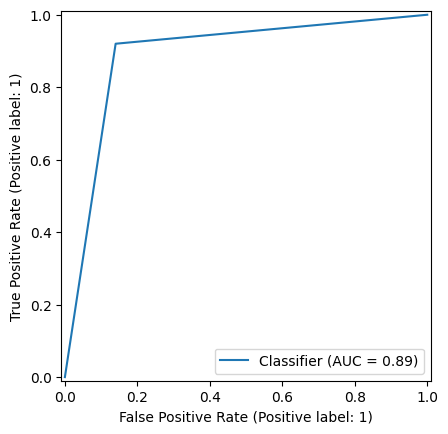

In [20]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(1,1)
RocCurveDisplay.from_predictions(y_test, y_pred_CV, drop_intermediate=False, ax=ax)
plt.show()